# Assignment 1 - Isaura Van de Weghe

## Introduction

For this assignment, we are going to explore data from **activity trackers**. 
Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. 

For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

The data derived from this study were simulated from the actual data to conform to the GDPR law.

In this assigment I will clean the dataset from the activity trackers and create a new column with the mean of the steps of each participant.

Finally I will try to predict average steps of a volunteer.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split #this is the function we need to split the data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


steps = pd.read_csv('steps.csv', delimiter= ';')
survey = pd.read_csv('survey.csv')

#use delimiter on the steps csv to convert it equally to the survey csv.



## First, I will merge the two dataframes together on 'id' 

In [3]:
total = survey.merge(steps, on='id')
total.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Next I will take a closer look at the dataframe and see if there are any numbers that catch my attention.

In [4]:
total.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


## We can see that the max weight is too high and the min height is too low. To make this visual, I will create a boxplot.

<AxesSubplot:xlabel='weight'>

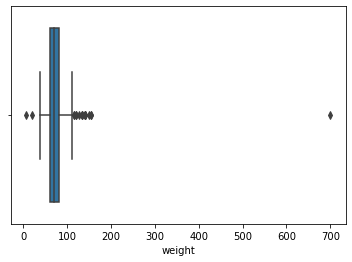

In [5]:
sns.boxplot(x='weight', data=total)

## In the boxplot we can see that the 700 is deffinitely an outlier and we should therefore delete it. We should also delete everything below 20 since there are no adults who weigh below 20 who use a fitbit/applewatch etc. 

In [6]:
total = total[(total['weight'] < 300) & (total['weight'] > 40)]
total.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,923.000000,923.000000,923.000000,922.000000,923.00000,24.000000,240.000000,275.000000,293.000000,350.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,464.616468,2.340195,2.526544,171.741866,72.32286,3642.416667,9018.937500,10880.509091,7420.573379,8088.220000,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,267.561999,1.227478,1.273840,9.047262,15.41824,3951.910368,6444.654214,6290.354387,6752.987153,5482.536385,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,45.00000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.500000,1.000000,1.000000,165.000000,61.00000,299.500000,4364.000000,6537.500000,2752.000000,4428.000000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.00000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,695.500000,3.000000,4.000000,179.000000,81.00000,6060.000000,12182.000000,14237.500000,10449.000000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,155.00000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


## Now we can see that the max weight is 155 kilo and the min weight is now 45 kilo

## Next, I will create the variable mean steps per participant.

In [7]:
total['steps_mean'] = total.loc[:, "20-6-2013":].mean(axis=1)


In [8]:
total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 928
Data columns (total 338 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    gender       object 
 3    age          object 
 4    hh_size      int64  
 5    education    int64  
 6    education_1  object 
 7    height       float64
 8    weight       float64
 9    20-6-2013    float64
 10   21-6-2013    float64
 11   22-6-2013    float64
 12   23-6-2013    float64
 13   24-6-2013    float64
 14   25-6-2013    float64
 15   26-6-2013    float64
 16   27-6-2013    float64
 17   28-6-2013    float64
 18   29-6-2013    float64
 19   30-6-2013    float64
 20   1-7-2013     float64
 21   2-7-2013     float64
 22   3-7-2013     float64
 23   4-7-2013     float64
 24   5-7-2013     float64
 25   6-7-2013     float64
 26   7-7-2013     float64
 27   8-7-2013     float64
 28   9-7-2013     float64
 29   10-7-2013    float64
 30   11-7-2013    float64
 31

## Next, I will create different analysses from the mean of each person's steps. 


<function matplotlib.pyplot.show(close=None, block=None)>

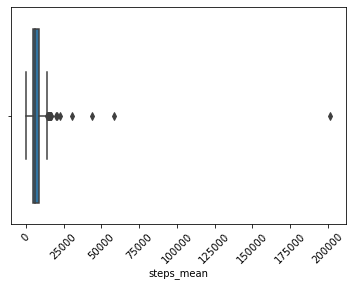

In [9]:
#graph of distribution boxplot.
ax = sns.boxplot(x= 'steps_mean', data=total)
plt.title= ('means steps per day')
plt.xlabel=  ('mean steps')
plt.ylabel= ('count')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

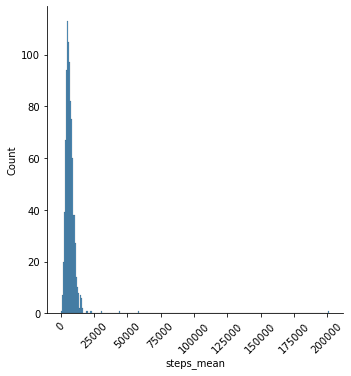

In [10]:
#graph of distribution displot.
ax = sns.displot(x='steps_mean', data=total)
plt.title= ('means steps per day')
plt.xlabel=  ('mean steps')
plt.ylabel= ('count')
plt.xticks(rotation=45)
plt.show

In [11]:
#Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

print('Median = ' +str(total['steps_mean'].median()))
print('Mean = ' +str(total['steps_mean'].mean()))
print('St Dev. = ' +str(total['steps_mean'].std()))

Median = 6244.857142857143
Mean = 7022.11918129949
St Dev. = 7410.699583607222


## From the information above we can say that there is one outlier of 200000 steps, which is possible but not very likely. the 200000 steps has a great influence on the mean and therefore it is better to leave out steps above 100000. Which will be done here below and also with a new summary:


In [12]:
total= total[total['steps_mean'] <100000]

In [13]:
# A new overview of the summary statistics:

print('Median =' +str(total['steps_mean'].median()))
print('Mean =' +str(total['steps_mean'].mean()))
print('St Dev. =' +str(total['steps_mean'].std()))

Median =6242.465088282504
Mean =6810.027154263868
St Dev. =3686.987088434079


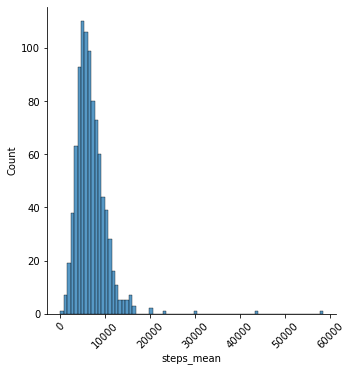

In [14]:
sns.displot(x="steps_mean", kde=False, data=total)
plt.xticks(rotation=45)
plt.show()

## Now I will look at the relation between the mean steps per participant as 'y'  and the categorical variables gender, age and education.

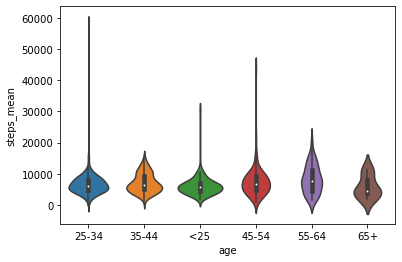

In [15]:
# A violin plot of the relation between the age and mean steps per participant.

sns.violinplot(x='age',y='steps_mean',data=total)
plt.show()

## Here we see that a lot of people below 25 years do not walk that much, the age groups 25-34 and 45-54 walk the most steps. However, the agegroup of 55-64 has most people devided over the steps and also a lot of them walk more then 10000 steps.

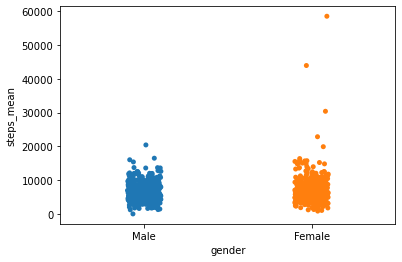

In [16]:
# A stripplot of the relation between the genders and the mean steps per participant.

sns.stripplot(x='gender', y='steps_mean', data=total)
plt.show()

## for the gender group we can see that it is quite similar, however there are a bit more female who walk more.

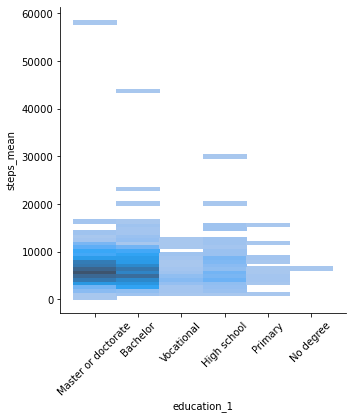

In [17]:
# A distplot of the relation between participant's education and the mean step per participant.

sns.displot(x='education_1', y='steps_mean', data=total)
plt.xticks(rotation=45)
plt.show()

## for the educational groups it is quite divided. There are however a lot of people with a master or doctorate and a bachelor and less people with primary or no degree.


## in addition to the plots above: 


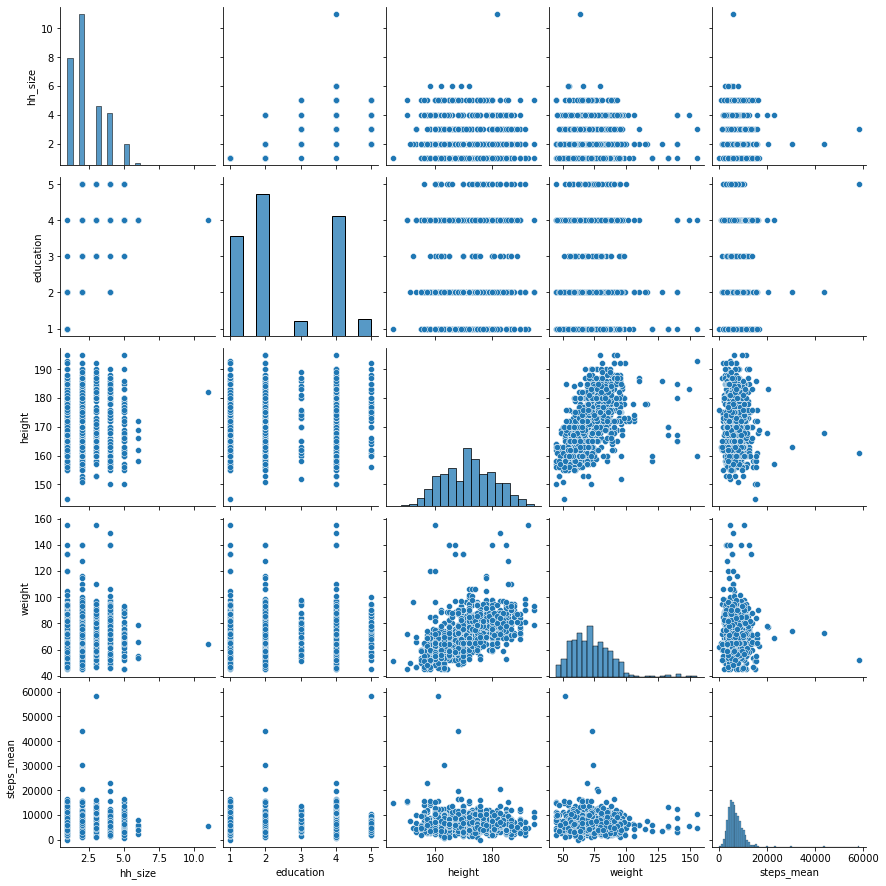

In [18]:
#scatterplot matrix of all numerical variables

total_sub = total[['age', 'hh_size', 'education', 'height', 'weight', 'steps_mean']]
sns.pairplot(total_sub)
plt.show()

In [29]:
# make a correlation of the numerical variables.

corr = total_sub.corr() 
corr

,hh_size,education,height,weight,steps_mean
hh_size,1.000000,0.824595,-0.051505,0.005082,0.032831
education,0.824595,1.000000,-0.036510,0.006290,0.035177
height,-0.051505,-0.036510,1.000000,0.509197,-0.090653
weight,0.005082,0.006290,0.509197,1.000000,-0.069089
steps_mean,0.032831,0.035177,-0.090653,-0.069089,1.000000


# Predictive model


## What is linear regression?
Linear regression is a model that shows a specific predicted calculation. the calculation takes into account different predictors and finds out which one is needed for a predictive model. furthermore a linear regression can show if the model of prediction is good or not. 

In [20]:
#To get a quick overview again of the dataframe I print the head.
total.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [21]:
#create a dummy variables

total2 = pd.get_dummies(total,columns=['gender', 'city', 'education_1', 'age'], drop_first=True)
total2.head()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,1,4,4,178.0,98.0,NaN,NaN,NaN,NaN,3941.0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,3,180.0,77.0,NaN,NaN,10473.0,705.0,4287.0,...,0,0,0,0,0,1,0,0,0,0
2,3,2,2,180.0,83.0,NaN,11428.0,12523.0,2553.0,190.0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,178.0,80.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,5,3,4,167.0,61.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Now we fit a linear regression model to predict the mean steps per participant, using the training data.

In [24]:
x = total2.loc[:, ~total2.columns.isin(['steps_mean'])] 
                                          
y = total2['steps_mean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=23)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

      id  hh_size  education  height  weight  20-6-2013  21-6-2013  22-6-2013  \
650  651        1          1   190.0    80.0        NaN        NaN        NaN   
779  780        3          4   175.0    71.0        NaN    11891.0    12523.0   
900  901        2          2   163.0    70.0        NaN        NaN        NaN   
365  366        4          4   173.0   106.0        NaN        NaN        NaN   
205  206        2          2   163.0    74.0      250.0    12182.0    20027.0   
..   ...      ...        ...     ...     ...        ...        ...        ...   
32    33        3          4   153.0    47.0        NaN    10127.0     4507.0   
493  494        1          1   174.0    60.0        NaN        NaN        NaN   
41    42        2          2   180.0    72.0        NaN        NaN        NaN   
750  751        1          1   170.0    64.0        NaN        NaN        NaN   
602  603        1          1   171.0    70.0        NaN        NaN        NaN   

     23-6-2013  24-6-2013  

In [26]:
# for some reason I get an error about the NAN values which I am not able to figure out. I tried to google it but I couldn't find a solution

lm = LinearRegression()

lm.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Evaluation

Unfortunately, since I can not run the LinearRegression I am not able to test the predictions as well as show the r2 and RMSE. 

In [ ]:
y_test_p = lm.predict(x_test)

In [ ]:
r2_score(y_test, y_test_p)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_test_p))